Exploratory phase:

Produce histograms and summary statistics of the DIME data for each of the office types: Congress and the upper and lower chambers of the California legislature.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
dcols = "Cycle,Name,RId,Party,RType,State,Seat,EType,CFScore".split(',')

cands12 = pd.read_csv("cands2012.csv", names=dcols)
cands14 = pd.read_csv("cands2014.csv", names=dcols)
cands = pd.concat([cands12, cands14])

In [3]:
# Remove the duplicates. Since the DIME score is the same for each candidate, as identified by the
# candidate identifier, we can take the minimum for each value of ID.
# Output: Series for each type of office with a DIME score for each candidate
chambers = {}
for chamb in 'federal:house,state:upper,state:lower'.split(','):
    chambers[chamb] = cands.loc[cands.Seat == chamb].groupby("RId")['CFScore'].min()
    chambers[chamb] = pd.to_numeric(chambers[chamb], errors='coerce')

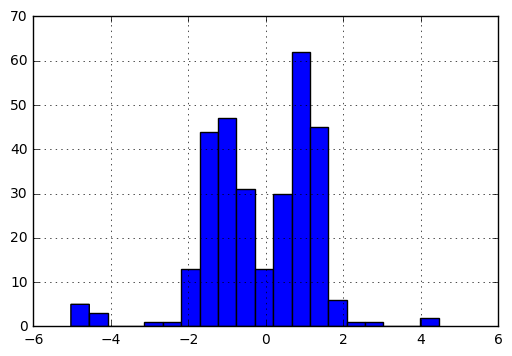

In [4]:
# Produce histograms for each office type.
# First Congress, then Upper house, then Lower house
# Smaller magnitude is more moderate,
# lower number is more liberal,
# higher number is more conservative
chambers['federal:house'][~chambers['federal:house'].isnull()].hist(bins=20)

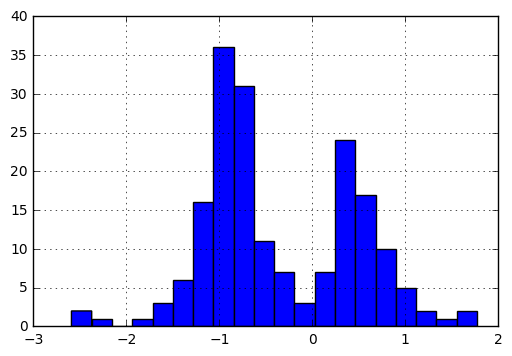

In [5]:
chambers['state:upper'].hist(bins=20)

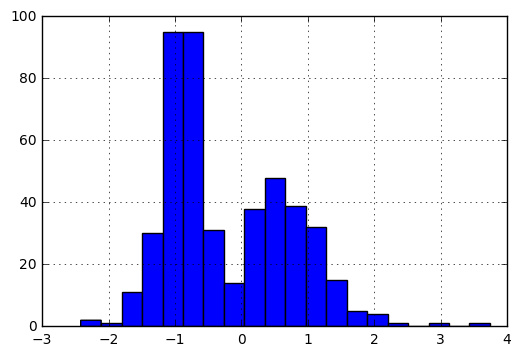

In [6]:
chambers['state:lower'].hist(bins=20)

Each of the histograms has a bimodal distribution with Democrats peaking at -1.0. The Republicans peak at 1.0 for Congress, but peak at 0.5 for state offices.

In [7]:
# Provide summary statistics (mean and standard deviation) for each chamber
clist = ['federal:house', 'state:upper', 'state:lower']
print("{:13s}  {:7s}  {:7s}".format("Office", "Mean", "St Dev"))
for ch in clist:
    print("{:13s}  {:7.3f}  {:7.3f}".format(ch, chambers[ch].mean(), chambers[ch].std()))

Office         Mean     St Dev 
federal:house   -0.139    1.389
state:upper     -0.360    0.814
state:lower     -0.213    0.932
